In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from imblearn.over_sampling import SMOTE



df = pd.read_csv('ibm_employee_attrition.csv')

In [2]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [3]:
df.isnull().sum()




Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

### **Preprocesamiento de datos**
A continuacion se van a eliminar 4 columnas que no son relevantes ya que los valores son repetidos o no favorecerian al entrenamiento del modelo. 




In [4]:
df.drop('EmployeeCount', axis = 1, inplace = True) 
df.drop('StandardHours', axis = 1, inplace = True) 
df.drop('EmployeeNumber', axis = 1, inplace = True) 
df.drop('Over18', axis = 1, inplace = True) 



In [5]:
print(list(df.columns))


['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [6]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


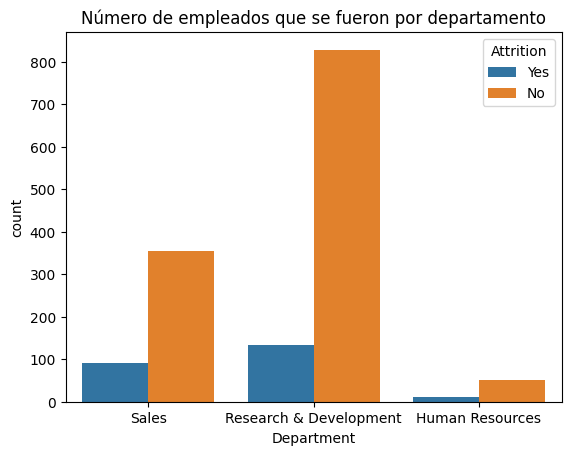

In [7]:
# Número de empleados que se fueron por departamento
sns.countplot(x='Department', hue='Attrition', data=df)
plt.title('Número de empleados que se fueron por departamento')
plt.show()

El siguiente nos muestra jajajajajaj

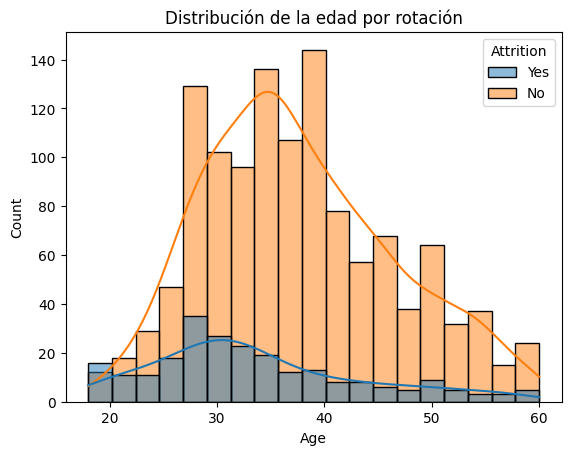

In [8]:
#Distribución de la edad por rotación
sns.histplot(data=df, x='Age', hue='Attrition', kde=True)
plt.title('Distribución de la edad por rotación')
plt.show()

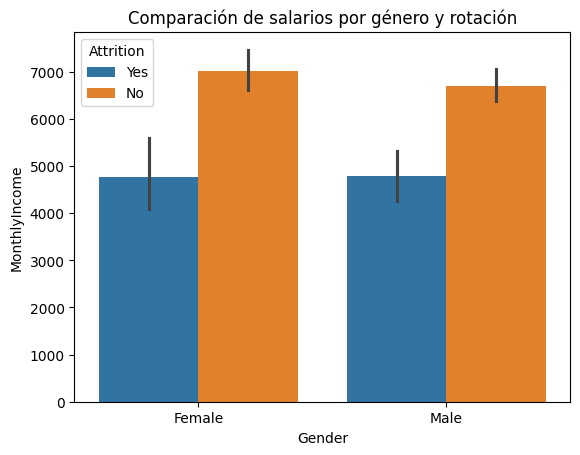

In [9]:
#Comparación de salarios por género y rotación
sns.barplot(x='Gender', y='MonthlyIncome', data=df, hue='Attrition')
plt.title('Comparación de salarios por género y rotación')
plt.show()

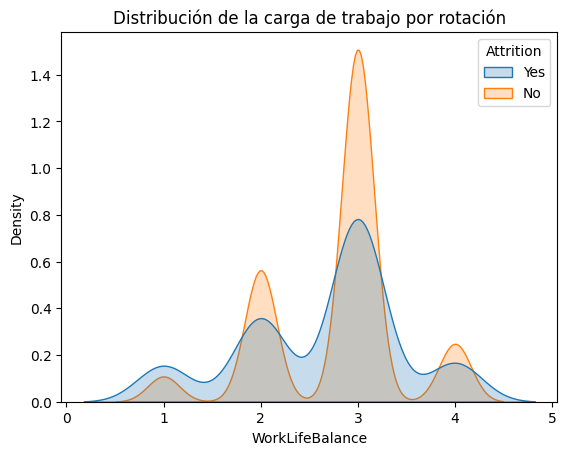

In [10]:
#Distribución de la carga de trabajo por rotación
sns.kdeplot(data=df, x='WorkLifeBalance', hue='Attrition', fill=True, common_norm=False)
plt.title('Distribución de la carga de trabajo por rotación')
plt.show()

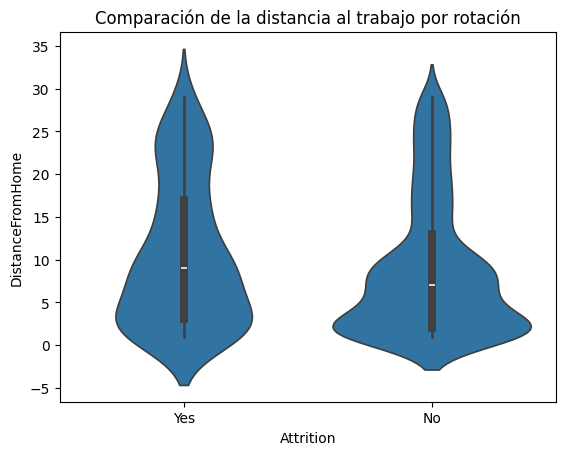

In [11]:
sns.violinplot(x='Attrition', y='DistanceFromHome', data=df)

plt.title('Comparación de la distancia al trabajo por rotación')
plt.show()

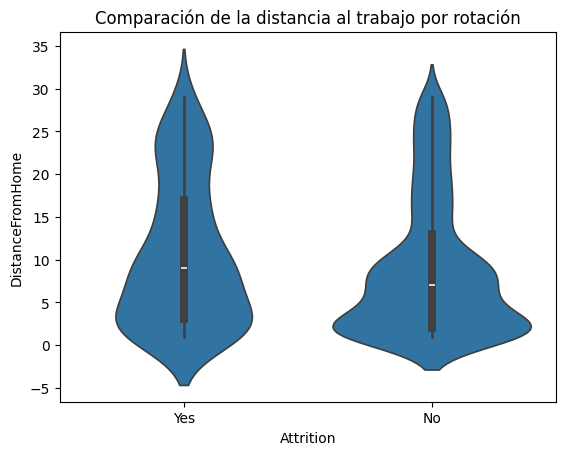

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que df es tu DataFrame
sns.violinplot(x='Attrition', y=df['DistanceFromHome'].clip(lower=0), data=df)
plt.title('Comparación de la distancia al trabajo por rotación')
plt.show()

In [13]:
print(list(df.columns))

['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


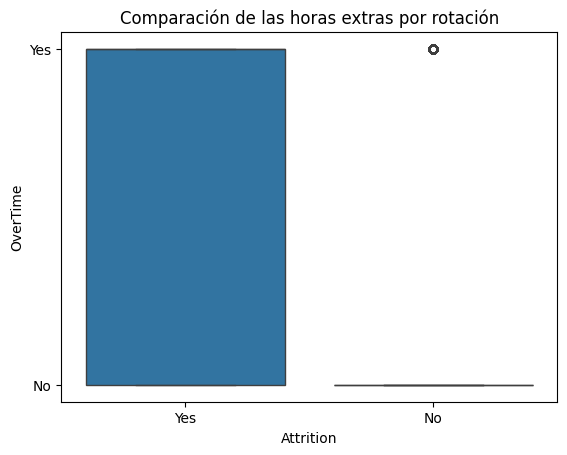

In [14]:
sns.boxplot(x='Attrition', y='OverTime', data=df)
plt.title('Comparación de las horas extras por rotación')
plt.show()

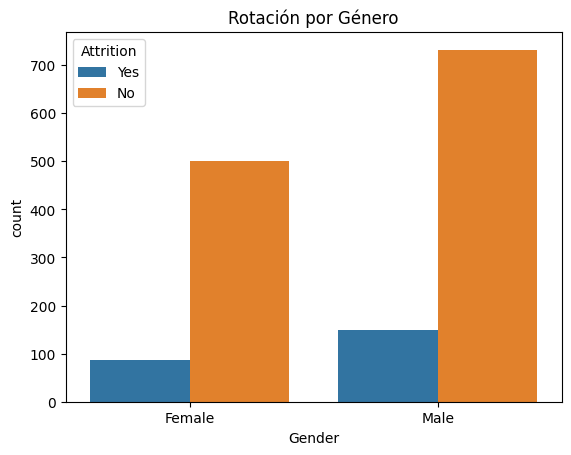

In [15]:
# Gráfico de barras apiladas para la rotación por género
sns.countplot(x='Gender', hue='Attrition', data=df)
plt.title('Rotación por Género')
plt.show()

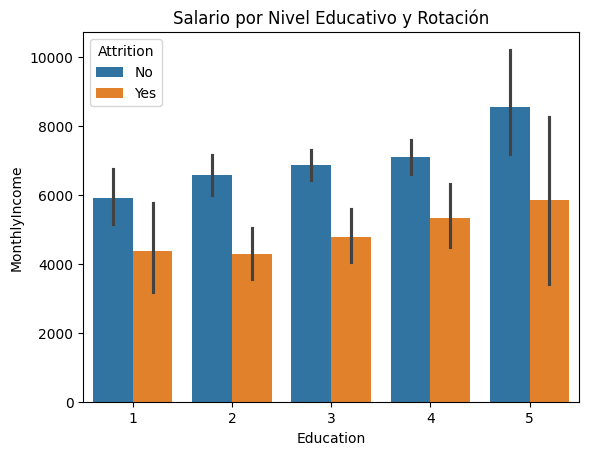

In [16]:
sns.barplot(x='Education', y='MonthlyIncome', hue='Attrition', data=df)
plt.title('Salario por Nivel Educativo y Rotación')
plt.show()

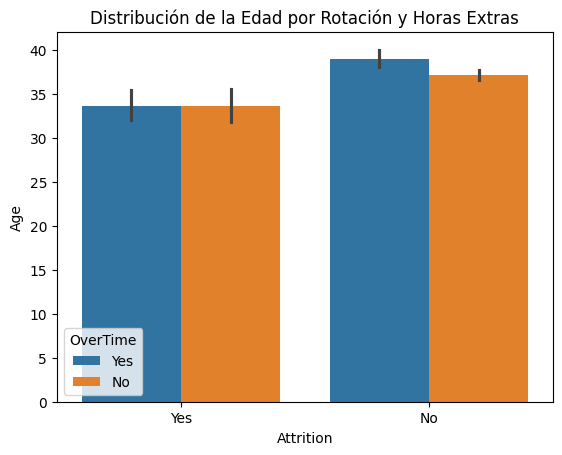

In [17]:
sns.barplot(x="Attrition", y="Age", hue="OverTime", data=df)
plt.title("Distribución de la Edad por Rotación y Horas Extras")
plt.show()

In [18]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [19]:


# Identifica las columnas categóricas
def encodeCategoricalCols(dataSet):
    # Identificar columnas categóricas
    categoricalCols = dataSet.select_dtypes(include=['object']).columns.tolist()

    # Crear un objeto LabelEncoder
    labelEncoder = LabelEncoder()

    # Codificar cada columna categórica
    for col in categoricalCols:
        dataSet[col] = labelEncoder.fit_transform(dataSet[col])

    return dataSet


newDataSet= encodeCategoricalCols(df.copy())
newDataSet.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


In [27]:
def dataSelec(dataSet,columns):
    # Seleccionar las k mejores características
    selector = SelectKBest(chi2, k=columns)
    y = dataSet['Attrition']
    XNew = selector.fit_transform(encodeCategoricalCols(dataSet), y)

    # Escalar las características seleccionadas
    scaler = StandardScaler()
    XScaled = scaler.fit_transform(XNew)

    # Balanceo de clases
    smote = SMOTE()
    XBalanced, yBalanced = smote.fit_resample(XScaled, y)
    return (XBalanced,yBalanced,XScaled)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


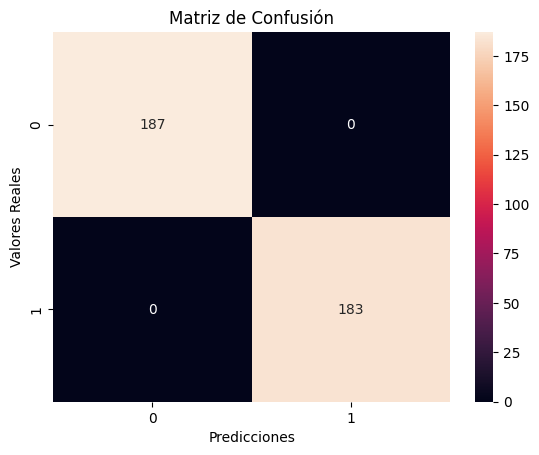

In [28]:


def knn(columns, dataSet,neighbors):

    xBalanced = dataSelec(dataSet,columns)[0]
    yBalanced = dataSelec(dataSet,columns)[1]
    
    # Dividir los datos en entrenamiento y prueba
    XTrain, XTest, yTrain, yTest = train_test_split(xBalanced, yBalanced, test_size=0.15, random_state=70)

    # Crear el  modelo KNN
    knn = KNeighborsClassifier(neighbors)

    # Entrenar el modelo
    knn.fit(XTrain, yTrain)

    # Hacer predicciones
    yPred = knn.predict(XTest)

    # Evaluar el modelo
    print("Accuracy:", accuracy_score(yTest, yPred))
    print("Precision:", precision_score(yTest, yPred))
    print("Recall:", recall_score(yTest, yPred))


    sns.heatmap(confusion_matrix(yTest, yPred), annot=True, fmt='d')
    plt.title('Matriz de Confusión')
    plt.xlabel('Predicciones')
    plt.ylabel('Valores Reales')
    plt.show()
    
knn(12, newDataSet.copy(), 5)

Accuracy: 1.0


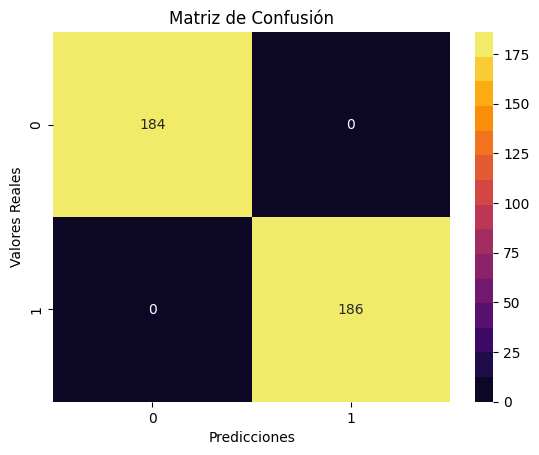

In [37]:
def count(dataset):
    x=0
    y=0
    for i in dataset:
        if i == 1:
            x +=1
        else:
            y +=1 
    return(x,y)
    

def logisticRegression(dataSet, columns):
    
    xBalanced = dataSelec(dataSet,columns)[0]
    yBalanced = dataSelec(dataSet,columns)[1]
    xScaled = dataSelec(dataSet,columns)[2]
    y = dataSet['Attrition']

    # Dividir los datos en entrenamiento y prueba
    XTrain, XTest, yTrain, yTest = train_test_split(xBalanced, yBalanced, test_size=0.15, random_state=12)

    # Crear el modelo de Regresión Logística
    logistic_regression = LogisticRegression()

    # Entrenar el modelo
    logistic_regression.fit(XTrain, yTrain)

    # Hacer predicciones
    yPred = logistic_regression.predict(XTest)

    # Evaluar el modelo 
    accuracy = accuracy_score(yTest, yPred)
    confusion_mat = confusion_matrix(yTest, yPred)


    print("Accuracy:", accuracy)
    palette = sns.color_palette( "inferno", n_colors= 15,)
    sns.heatmap(confusion_matrix(yTest, yPred), annot=True, fmt='d', cmap=palette)
    plt.title('Matriz de Confusión')
    plt.xlabel('Predicciones')
    plt.ylabel('Valores Reales')
    plt.show()


logisticRegression(df.copy(), 5)